<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/PHSMM_rain_seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('PHSMM')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(PHSMM)

# P0: Muskox

* Thay số ngày di chuyển của con bò bằng số giờ wet
* Thay số bước di chuyển của con bò bằng cường độ mưa (intens)
* Ví dụ 2013-10-11 22:00:00 ngày 15 con bò đi được 17.9988738 bước

In [ ]:
head(muskox)

,date,tday,x,y,step
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
88273,2013-10-11 22:00:00,15,513299.2,8264867,17.998874
88274,2013-10-11 22:00:00,16,513283.4,8264875,8.214733
88275,2013-10-11 22:00:00,17,513284.3,8264883,7.205098
88276,2013-10-11 22:00:00,18,513280.4,8264877,53.378332
88277,2013-10-11 22:00:00,19,513252.0,8264922,719.242687
88278,2013-10-11 22:00:00,20,513386.7,8265629,10.797127


# P0a: raindate

In [ ]:
raindate=read.csv('/content/sample_data/raindate.csv',head=T)
# raindate

In [ ]:
head(raindate)

,X,begin,end,dd,ss,intens,inter,begin_date,end_date
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,0,2231,2231,1,0.3,0.300000,0,1961-04-03 23:00:00,1961-04-03 23:00:00
2,1,2234,2250,17,76.7,4.511765,4,1961-04-04 02:00:00,1961-04-04 18:00:00
3,2,2409,2419,11,23.2,2.109091,176,1961-04-11 09:00:00,1961-04-11 19:00:00
4,3,2421,2421,1,0.1,0.100000,13,1961-04-11 21:00:00,1961-04-11 21:00:00
5,4,2507,2508,2,0.9,0.450000,87,1961-04-15 11:00:00,1961-04-15 12:00:00
6,5,2650,2652,3,0.9,0.300000,144,1961-04-21 10:00:00,1961-04-21 12:00:00


# P0b: Thay toàn bộ giá trị step bằng intens

In [ ]:
# muskox$step<-raindate$intens;

#  P1:Bernoulli distribution

In [ ]:
dbern(c(0,1),0.4)

[1] 0.6 0.4

In [ ]:
pbern(c(0,1),0.4)

[1] 0.6 1.0

# P2: decodeHSMM

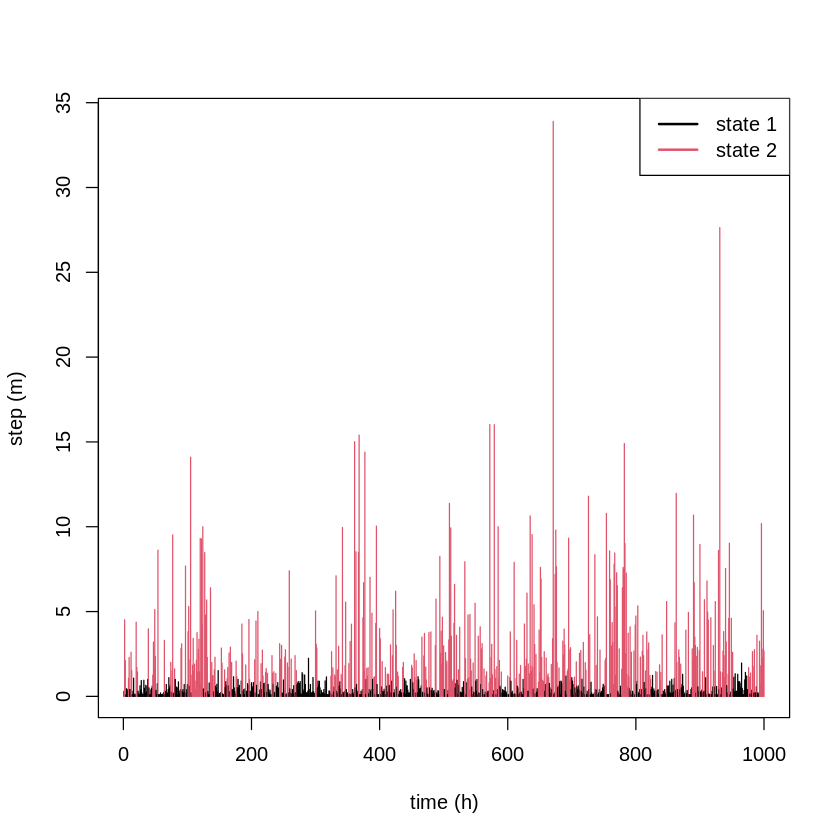

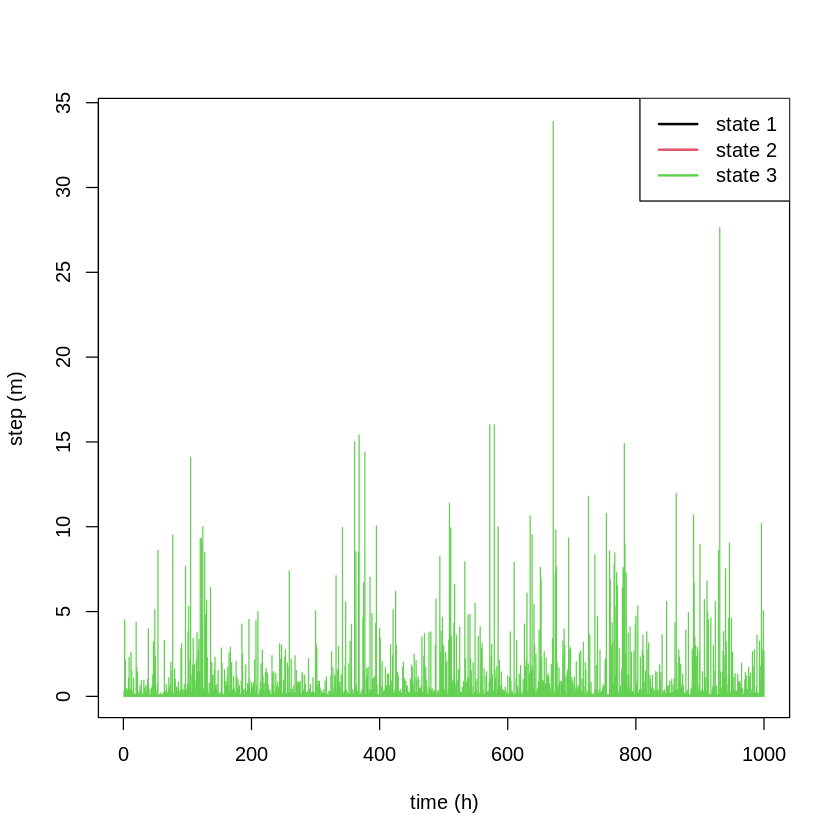

In [ ]:
# running this example might take a few minutes
#
# 1.) 2-state gamma-HSMM for hourly muskox step length
# with an unstructured start of length of 10
#
# initial values
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
mu0<-c(5,150)
sigma0<-c(3,180)
#
# fit 2-state gamma-HSMM with lambda=c(100,100)
# and difference order 3
# estimation might take a few minutes
# PHSMM<-pmleHSMM(y=muskox$step,N=2,p_list=p_list0,mu=mu0, #ORG
PHSMM<-pmleHSMM(y=raindate$intens,N=2,p_list=p_list0,mu=mu0,
sigma=sigma0,lambda=c(100,100),order_diff=3,
y_dist='gamma')
#
# state decoding
s_HSMM<-decodeHSMM(raindate$intens,mod=PHSMM)
# plot sequence of the decoded time series
plot(raindate$intens[1:1000],type='h',xlab='time (h)',ylab='step (m)',
main='',col=s_HSMM)
legend('topright',c('state 1','state 2'),lwd=2,col=1:2)
# running this example might take a few minutes
#
# 2.) 3-state gamma-HSMM for hourly muskox step length
# with an unstructured start of length of 10
#
# initial values
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[3]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
omega0<-matrix(0.5,3,3)
diag(omega0)<-0
mu0<-c(5,100,350)
sigma0<-c(3,90,300)
#
# fit 3-state gamma-HSMM with lambda=c(1000,1000,1000)
# and difference order 3
# estimation might take some minutes
PHSMM<-pmleHSMM(y=raindate$intens,N=3,p_list=p_list0,mu=mu0,
sigma=sigma0,omega=omega0,
lambda=c(1000,1000,1000),
order_diff=3,y_dist='gamma')
#
# state decoding
s_HSMM<-decodeHSMM(raindate$intens,mod=PHSMM)
# plot sequence of the decoded time series
plot(raindate$intens[1:1000],type='h',xlab='time (h)',ylab='step (m)',
main='',col=s_HSMM)
legend('topright',c('state 1','state 2', 'state 3'),lwd=2,col=1:3)


# P3: n2wHSMM

In [ ]:
# natural parameters for 2-state HSMM with state-dependent normal distributions
p_list0<-list() # list of dwell-time distribution vectors,
# vector elements must sum to one
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.1),1-pgeom(9,0.1))
mu0<-c(-10,10) # mean values
sigma0<-c(3,5) # standard deviations
# parameter transformation:
n2wHSMM(N=2,p_list=p_list0,mu=mu0,sigma=sigma0,y_dist='norm',stationary=TRUE)

[1]   0.2231436  -0.2231436  -0.4462871  -0.6694307  -0.8925742  -1.1157178
 [7]  -1.3388613  -1.5620049  -1.7851484  -0.3988540   0.1053605  -0.1053605
[13]  -0.2107210  -0.3160815  -0.4214421  -0.5268026  -0.6321631  -0.7375236
[19]  -0.8428841   1.3543405 -10.0000000  20.0000000   1.0986123   1.6094379

# P4: nll_Rcpp

negative HMM log-likelihood

# P5: npllHSMM

In [ ]:
# 3-state gamma HSMM and hourly muskox step length
# natural parameters
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[3]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
omega0<-matrix(0.5,3,3)
diag(omega0)<-0
mu0<-c(5,100,350)
sigma0<-c(3,90,300)
R_vec<-sapply(p_list0,length)-1 # lengths of the unstructured starts
# working parameter vector
parvect<-n2wHSMM(N=3,p_list=p_list0,mu=mu0,sigma=sigma0,
omega=omega0,y_dist='gamma')
# evaluate the negative penalised log-likelihood function
npllHSMM(parvect,N=3,raindate$intens,R_vec=R_vec,lambda=c(1000,1000,1000),
order_diff=2,y_dist="gamma",T_y=nrow(raindate))

[1] 39693.94

# P6: plotDw

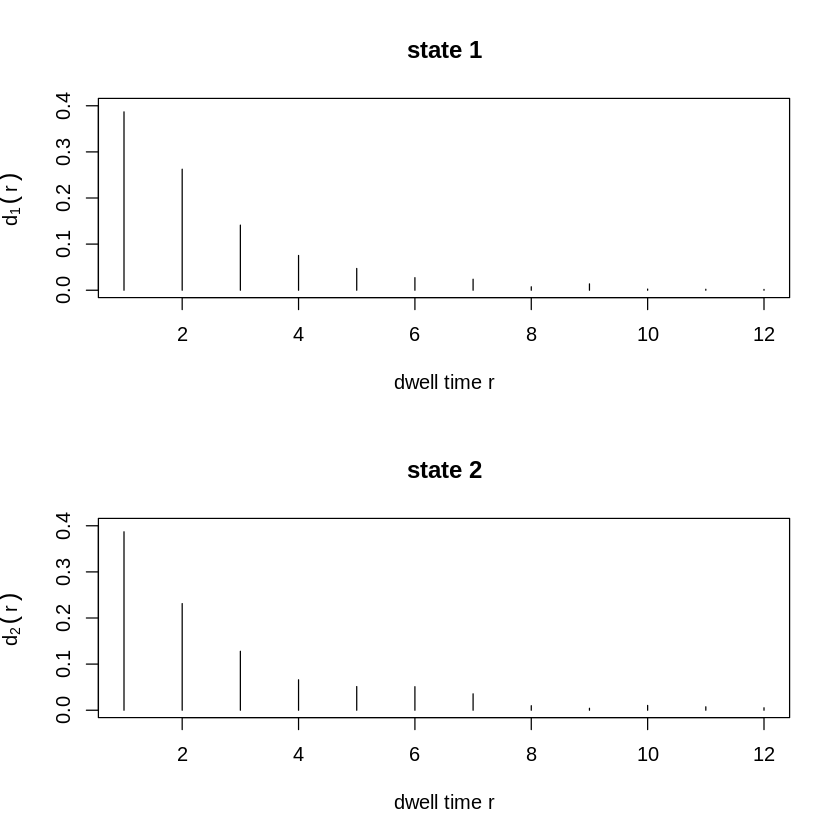

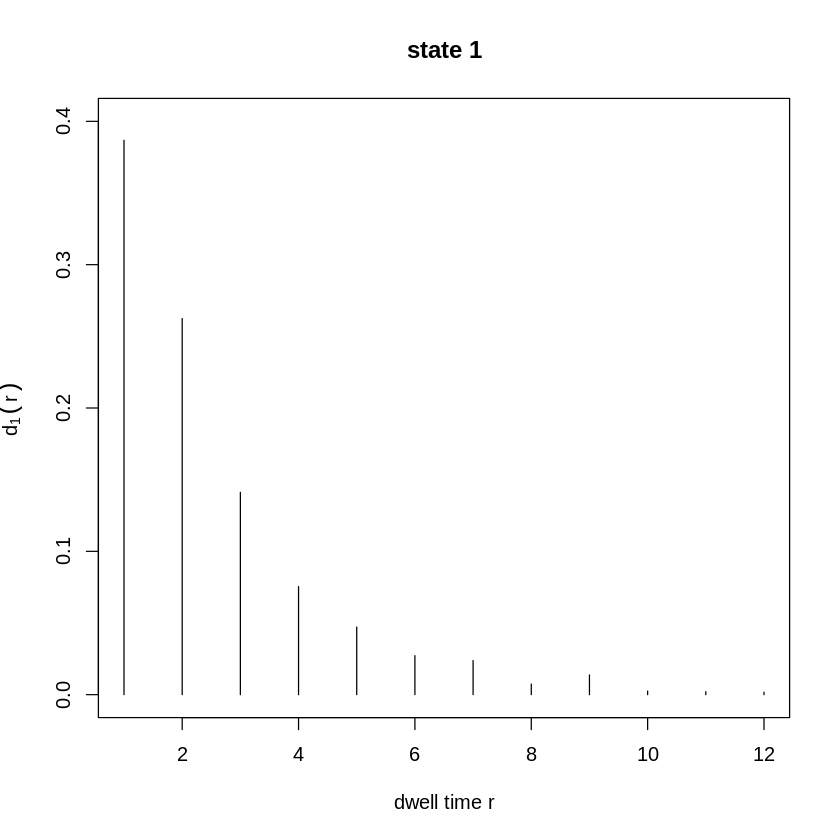

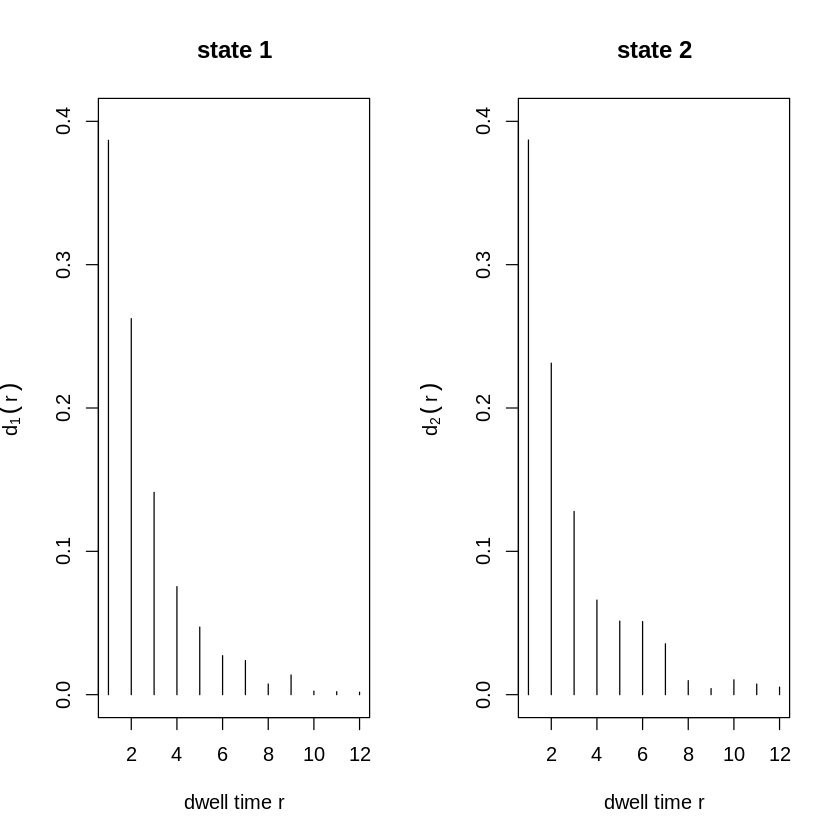

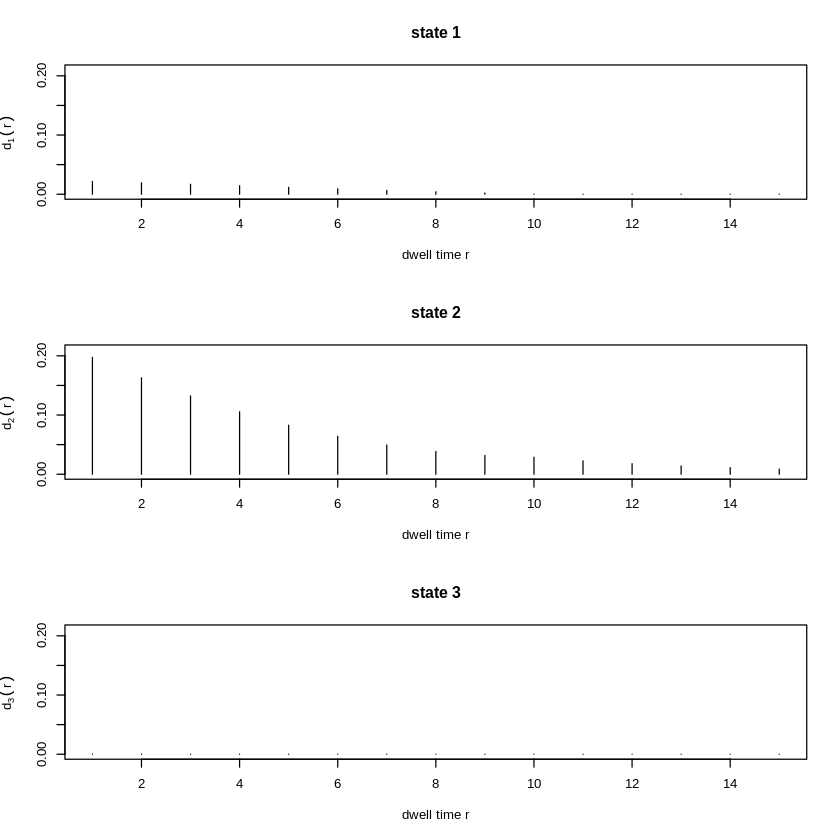

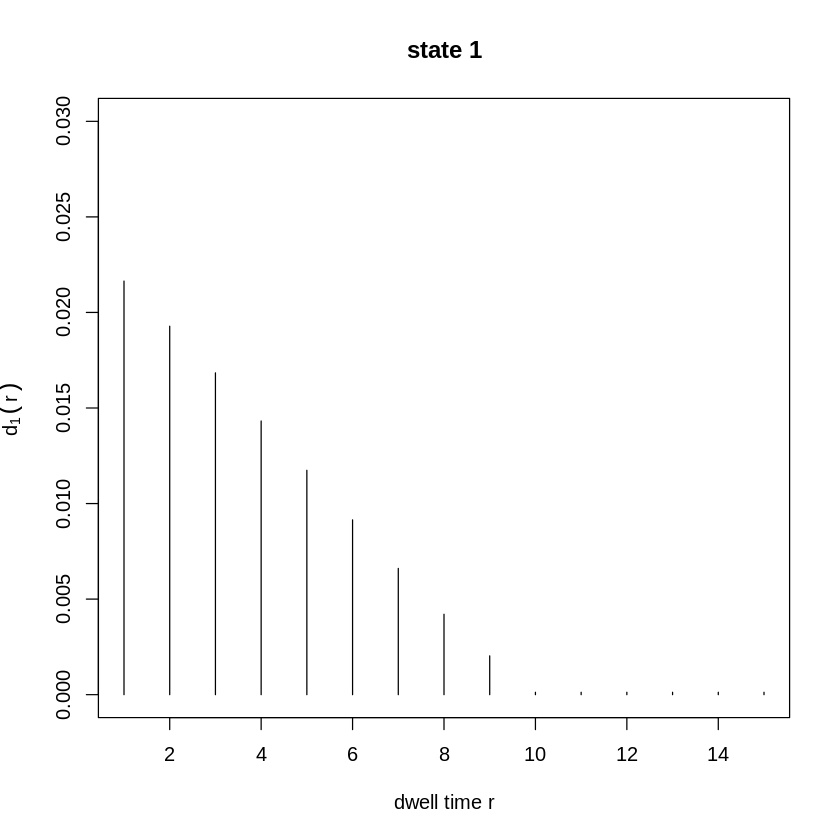

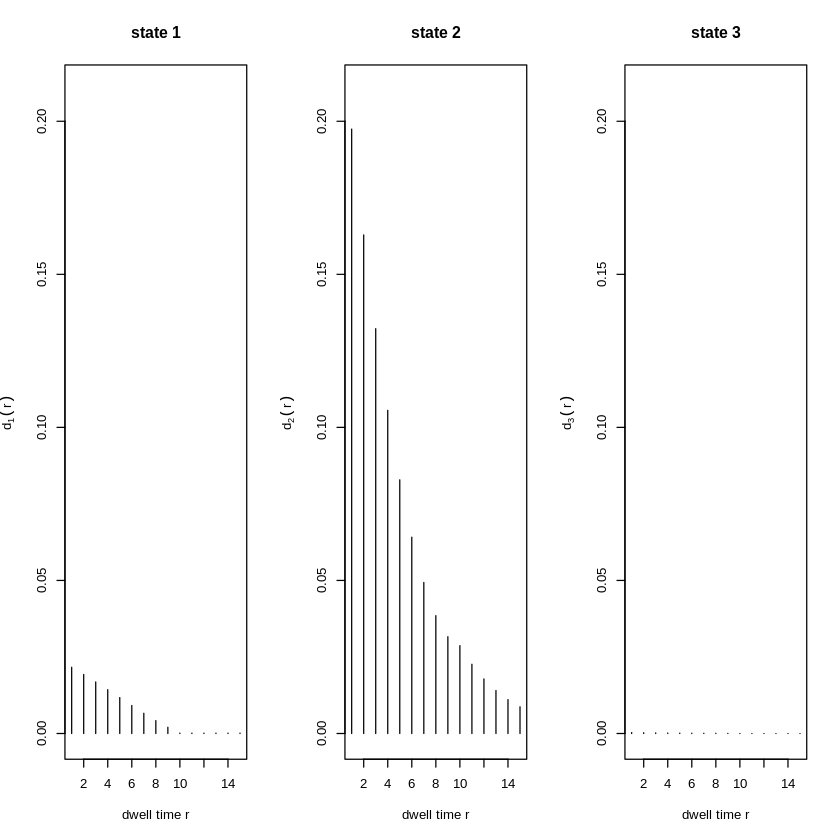

In [ ]:
# running this example might take a few minutes
#
# 1.) 2-state gamma-HSMM for hourly muskox step length
# with an unstructured start of length of 10
#
# initial values
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
mu0<-c(5,150)
sigma0<-c(3,180)
#
# fit 2-state gamma-HSMM with lambda=c(100,100)
# and difference order 3
# estimation might take a few minutes
PHSMM<-pmleHSMM(y=raindate$intens,N=2,p_list=p_list0,mu=mu0,
sigma=sigma0,lambda=c(100,100),order_diff=3,
y_dist='gamma')
#
# plot the estimated dwell-time distributions
# for dwell-times up to 12
plotDw(mod=PHSMM,R_max=12)
plotDw(mod=PHSMM,R_max=12,state=1)
plotDw(mod=PHSMM,R_max=12,mfrow=c(1,2))
# running this example might take a few minutes
#
# 2.) 3-state gamma-HSMM for hourly muskox step length
# with an unstructured start of length of 10
#
# initial values
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[3]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
omega0<-matrix(0.5,3,3)
diag(omega0)<-0
mu0<-c(5,100,350)
sigma0<-c(3,90,300)
#
# fit 3-state gamma-HSMM with lambda=c(1000,1000,1000)
# and difference order 3
# estimation might take some minutes
PHSMM<-pmleHSMM(y=raindate$intens,N=3,p_list=p_list0,mu=mu0,
sigma=sigma0,omega=omega0,
lambda=c(1000,1000,1000),
order_diff=3,y_dist='gamma')
#
# plot the estimated dwell-time distributions
# for dwell-times up to 15
plotDw(mod=PHSMM,R_max=15)
plotDw(mod=PHSMM,R_max=15,state=1)
plotDw(mod=PHSMM,R_max=15,mfrow=c(1,3))

# P7: pmleHSMM

In [ ]:
# running this example might take a few minutes
#
# 1.) fit 2-state gamma-HSMM to hourly muskox step length
# using a length of 10 for the unstructured start
#
# initial values
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
mu0<-c(5,150)
sigma0<-c(3,180)
#
# fit 2-state gamma-HSMM with lambda=c(100,100)
# and difference order 3
# estimation might take a few minutes
PHSMM<-pmleHSMM(y=raindate$intens,N=2,p_list=p_list0,mu=mu0,
sigma=sigma0,lambda=c(100,100),order_diff=3,
y_dist='gamma')
# running this example might take a few minutes
#
# 2.) fit 3-state gamma-HSMM to hourly muskox step length
# using a length of 10 for the unstructured start
#
# initial values
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[3]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
omega0<-matrix(0.5,3,3)
diag(omega0)<-0
mu0<-c(5,100,350)
sigma0<-c(3,90,300)
#
# fit 3-state gamma-HSMM with lambda=c(1000,1000,1000)
# and difference order 3
# estimation might take some minutes
PHSMM<-pmleHSMM(y=raindate$intens,N=3,p_list=p_list0,mu=mu0,
sigma=sigma0,omega=omega0,
lambda=c(1000,1000,1000),
order_diff=3,y_dist='gamma')

# P8: pseudoResHSMM

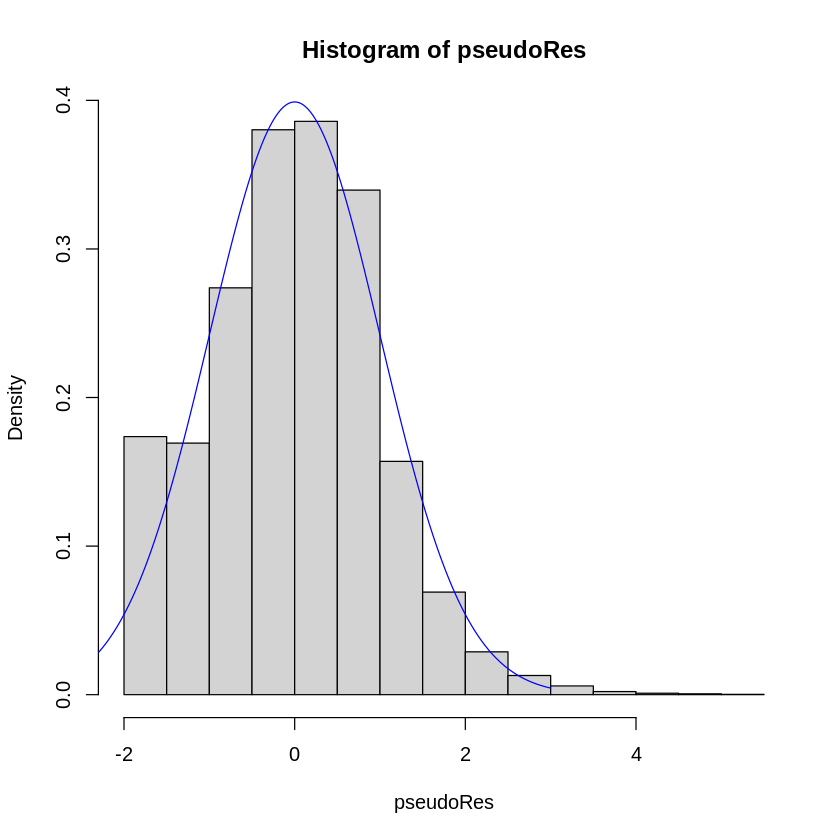

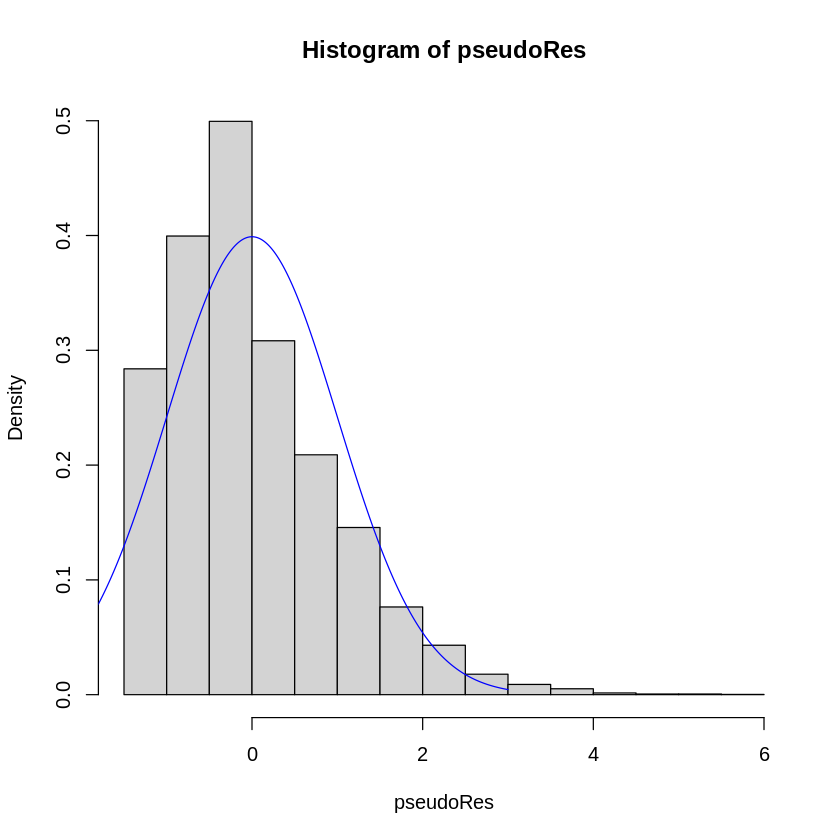

In [ ]:
# running this example might take a few minutes
#
# 1.) 2-state gamma-HSMM for hourly muskox step length
# with an unstructured start of length of 10
#
# initial values
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
mu0<-c(5,150)
sigma0<-c(3,180)
#
# fit 2-state gamma-HSMM with lambda=c(100,100)
# and difference order 3
# estimation might take a few minutes
PHSMM<-pmleHSMM(y=raindate$intens,N=2,p_list=p_list0,mu=mu0,
sigma=sigma0,lambda=c(100,100),order_diff=3,
y_dist='gamma')
#
# pseudo-residuals
pseudoRes<-pseudoResHSMM(y=raindate$intens,PHSMM)
hist(pseudoRes,probability=TRUE)
z<-seq(-3,3,0.01)
lines(z,dnorm(z),col='blue')
# running this example might take a few minutes
#
# 2.) 3-state gamma-HSMM for hourly muskox step length
# with an unstructured start of length of 10
#
# initial values
p_list0<-list()
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[3]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
omega0<-matrix(0.5,3,3)
diag(omega0)<-0
mu0<-c(5,100,350)
sigma0<-c(3,90,300)
#
# fit 3-state gamma-HSMM with lambda=c(1000,1000,1000)
# and difference order 3
# estimation might take some minutes
PHSMM<-pmleHSMM(y=raindate$intens,N=3,p_list=p_list0,mu=mu0,
sigma=sigma0,omega=omega0,
lambda=c(1000,1000,1000),
order_diff=3,y_dist='gamma')
#
# pseudo-residuals
pseudoRes<-pseudoResHSMM(y=raindate$intens,PHSMM)
hist(pseudoRes,probability=TRUE)
z<-seq(-3,3,0.01)
lines(z,dnorm(z),col='blue')

# P9: tpmHMM

In [ ]:
# list of dwell-time probability vectors
# (vector elements should not sum to one)
d_r<-list()
d_r[[1]]<-c(dgeom(0:9,0.2))
d_r[[2]]<-c(dgeom(0:9,0.1))
# tranistion probability matrix:
Gamma<-tpmHMM(N=2,omega=matrix(c(0,1,1,0),2,2),
d_r=d_r,R_vec=sapply(d_r,length))

# P10: w2nHSMM

In [ ]:
# natural parameters for 2-state HSMM with state-dependent normal distributions
p_list0<-list() # list of dwell-time distribution vectors,
# vector elements must sum to one
p_list0[[1]]<-c(dgeom(0:9,0.2),1-pgeom(9,0.2))
p_list0[[2]]<-c(dgeom(0:9,0.1),1-pgeom(9,0.1))
mu0<-c(-10,10) # mean values
sigma0<-c(3,5) # standard deviations
# parameter transformation:
parvect<-n2wHSMM(N=2,p_list=p_list0,mu=mu0,sigma=sigma0,y_dist='norm',stationary=TRUE)
# back-transformation:
npar<-w2nHSMM(N=2,parvect=parvect,R_vec=sapply(p_list0,length)-1,y_dist='norm')

# P11: Viết dữ liệu maskov ra csv

http://www.sthda.com/english/wiki/exporting-data-from-r

In [ ]:
# Loading mtcars data
data("muskox")
# Write data to txt file: tab separated values
# sep = "\t"
write.table(muskox, file = "muskox.txt", sep = "\t",
            row.names = TRUE, col.names = NA)
# Write data to csv files:  
# decimal point = "." and value separators = comma (",")
write.csv(muskox, file = "muskox1.csv")
# Write data to csv files: 
# decimal point = comma (",") and value separators = semicolon (";")
write.csv2(muskox, file = "muskox2.csv")
